In [21]:
#Importing modules and files
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import os

dir_black = os.path.join('../input/soil-types/Soil types/Black Soil')
dir_Cinder = os.path.join('../input/soil-types/Soil types/Cinder Soil')
dir_Laterite = os.path.join('../input/soil-types/Soil types/Laterite Soil')
dir_peat = os.path.join('../input/soil-types/Soil types/Peat Soil')
dir_yellow = os.path.join('../input/soil-types/Soil types/Yellow Soil')
        

## Loading Data

In [8]:
#defining the classes
classes=[ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

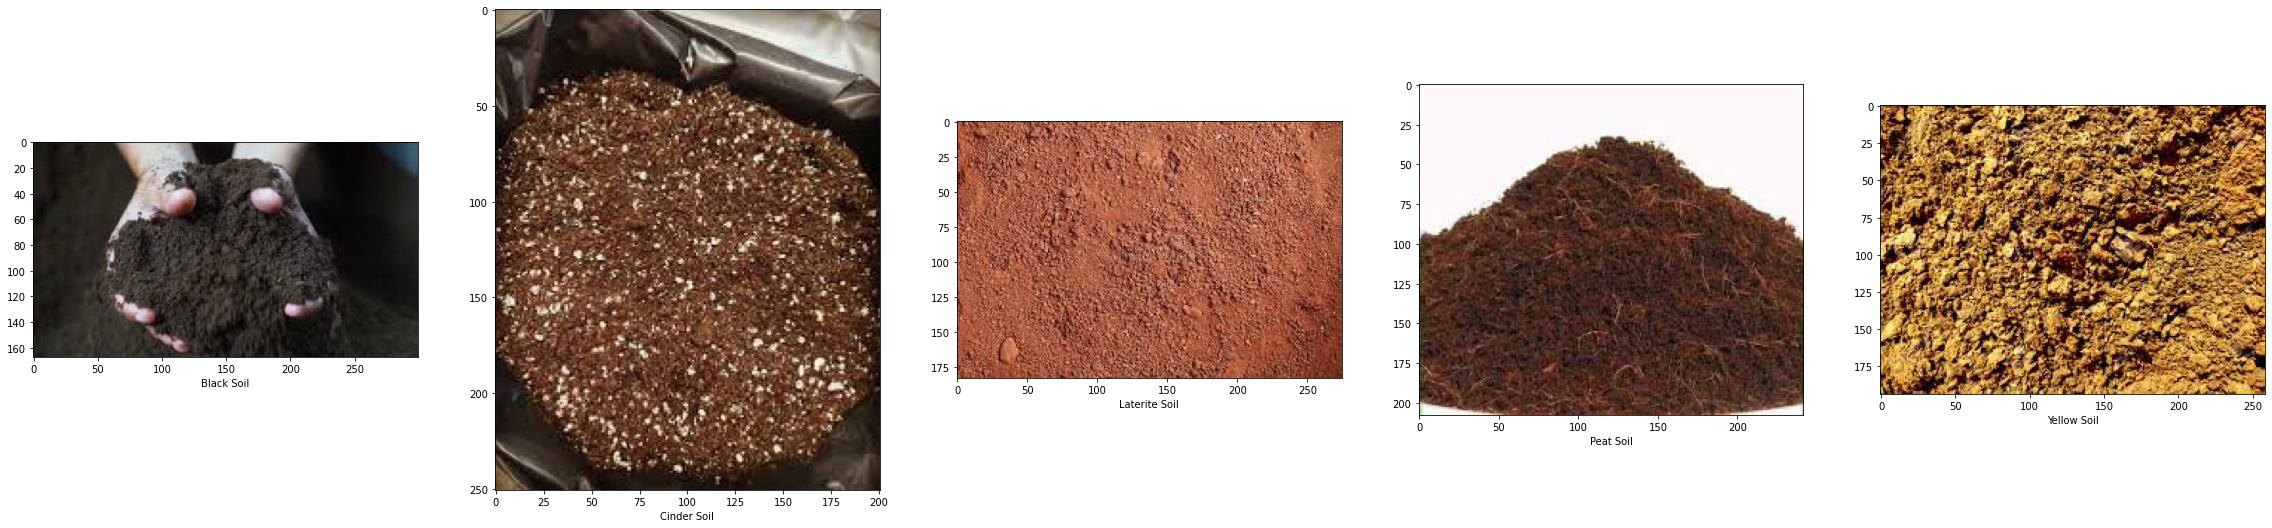

In [11]:
#Testing if data is loaded correctly
fig,ax=plt.subplots(1,5,figsize=(40,20))
for i,folder in enumerate([dir_black ,dir_Cinder,dir_Laterite, dir_peat,dir_yellow]):
    l=os.listdir(folder)
    address=os.path.join(folder,l[0])
    img=plt.imread(address)
    ax[i].imshow(img)
    ax[i].set_xlabel(classes[i])
    

In [15]:
#Adding data loader parameters
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [14]:
#Creating data generators to load images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


train_generator = datagen.flow_from_directory(
        '../input/soil-types/Soil types/', 
        target_size=(220, 220),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
        class_mode='categorical',
        subset='training'

)

valid_generator = datagen.flow_from_directory(
        '../input/soil-types/Soil types/', 
        target_size=(220, 220),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
        class_mode='categorical',
        subset='validation'

)

Found 126 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [18]:
#Checking for data distribution
count=[]
for val,name in enumerate([ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']):
    print(f'{name}:{list(train_generator.classes).count(val)}')
    count.append(list(train_generator.classes).count(val))

Black Soil:30
Cinder Soil:24
Laterite Soil:24
Peat Soil:24
Yellow Soil:24


<BarContainer object of 5 artists>

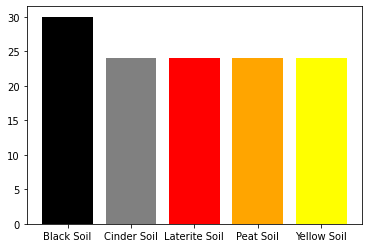

In [19]:
plt.bar([ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],count,color=['black','gray','red','orange','yellow'])

## Training

In [22]:
#Defining our sequential model
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        3

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [13]:
total_sample = train_generator.n
total_sample_valid=valid_generator.n
n_epochs = 30

In [14]:
history = model.fit(
        train_generator, 
        validation_data=valid_generator,
        validation_steps=int(total_sample_valid/batch_size),  
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
12/12 [==============================] - 5s 362ms/step - loss: 1.6965 - acc: 0.1898 - val_loss: 1.5871 - val_acc: 0.2667
Epoch 2/30
12/12 [==============================] - 3s 261ms/step - loss: 1.5790 - acc: 0.2720 - val_loss: 1.3294 - val_acc: 0.3667
Epoch 3/30
12/12 [==============================] - 3s 260ms/step - loss: 1.4309 - acc: 0.2870 - val_loss: 1.1305 - val_acc: 0.4333
Epoch 4/30
12/12 [==============================] - 3s 259ms/step - loss: 1.2136 - acc: 0.3778 - val_loss: 0.9788 - val_acc: 0.4333
Epoch 5/30
12/12 [==============================] - 3s 267ms/step - loss: 1.2340 - acc: 0.3548 - val_loss: 1.0702 - val_acc: 0.4000
Epoch 6/30
12/12 [==============================] - 3s 266ms/step - loss: 1.0693 - acc: 0.4207 - val_loss: 1.2332 - val_acc: 0.5000
Epoch 7/30
12/12 [==============================] - 3s 262ms/step - loss: 1.1302 - acc: 0.5437 - val_loss: 1.2059 - val_acc: 0.4000
Epoch 8/30
12/12 [==============================] - 3s 267ms/step - loss: 1.

In [16]:
import matplotlib.pyplot as plt

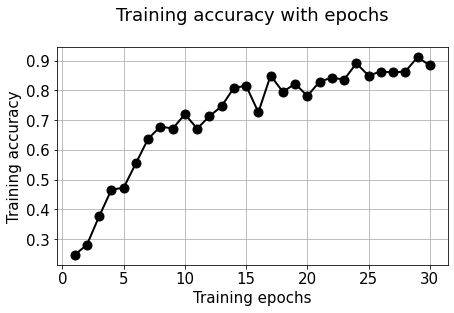

In [17]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Some ways to save the model...**

The saved model formats can be used to continue with the model preparation without actually starting from the beginning.<br>
The saved model files can be used to deploy the model in android or web applications.

In [ ]:
model.save_weights("model.h5")

## Testing 

In [20]:
import cv2 as cv

In [21]:
img=cv.imread("/kaggle/input/test-data/cinder.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img=cv.resize(img,(220,220))
img=np.reshape(img,(1,220,220,3))

In [22]:
img=img/255

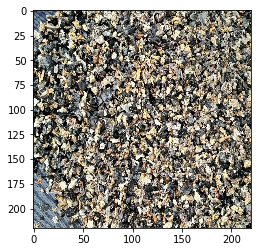

In [23]:
current_image=np.array(img)
current_image = current_image.reshape(220,220,3) 
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [24]:
np.argmax(model.predict(img))

1